<a href="https://colab.research.google.com/github/Rafiryd/Rafiryd/blob/rafiryd/skripsi2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Referensi: https://www.linkedin.com/pulse/how-scrape-google-play-reviews-4-simple-steps-using-python-kundi/

!pip install google-play-scraper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google_play_scraper import app

import pandas as pd

import numpy as np

In [3]:
# Scrape All available reviews 
#(DONT RUN THIS CELL!!! RUN ONLY IF YOU WANT TO SCRAPE ALL AVAILABLE REVIEWS)
#JANGAN DI RUN KODE INI, KECUALI ANDA INGIN SCRAPE SEMUA REVIEWS SEKALIGUS

from google_play_scraper import Sort, reviews_all

result = reviews_all(
    'com.bukalapak.android',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT , you can use Sort.NEWEST to get newst reviews
)


KeyboardInterrupt: ignored

In [3]:
#Scrape desired number of reviews
#Run kode ini jika ingin scrape data dengan jumlah tertentu. Ganti (misal, ingin scrape sejumlah 1000, maka ganti kode , count = 1000 )

from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.bukalapak.android',
    lang='id', # defaults to 'en'
    country='id', # defaults to 'us'
    sort=Sort.MOST_RELEVANT, # defaults to Sort.MOST_RELEVANT you can use Sort.NEWEST to get newst reviews
    count=1001, # defaults to 100
    filter_score_with=None # defaults to None(means all score) Use 1 or 2 or 3 or 4 or 5 to select certain score
)

In [4]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])

df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))

df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,6fa67572-5ca0-4ebc-8edc-24eda3025085,ReGodam ReloadME,https://play-lh.googleusercontent.com/a-/ACNPE...,"Menu dalam apps lebih sedikit, contohnya tidak...",2,444,5.17.1,2022-08-04 05:10:30,None,NaT
1,24dce380-728f-421b-be6e-8a4fd359340a,Rahman F Official,https://play-lh.googleusercontent.com/a-/ACNPE...,"Apk.nya bagus sih, cuma kalau ada pesanan masu...",3,11,5.22.1,2022-10-15 03:40:36,None,NaT
2,753e28ab-d262-4900-84b5-208671eab4d7,FilNoz CH,https://play-lh.googleusercontent.com/a/ALm5wu...,Mau belanja ribet di BukaLapak harus melalui D...,1,262,5.18.0,2022-08-15 16:53:45,"Halo kak, maaf udah bikin kesel ya Kak. Jangan...",2021-12-18 09:19:18
3,3fc67f75-594e-479d-86c9-a3c5fcdc6212,ahmad y,https://play-lh.googleusercontent.com/a-/ACNPE...,dari pelayanan sih ga pernah mengecewakan. Tap...,5,115,5.18.0,2022-09-22 10:36:22,None,NaT
4,0544c875-cbfe-44d4-911a-d528a774863e,Denny Pramudita,https://play-lh.googleusercontent.com/a-/ACNPE...,"Sangat kecewa sekali, pembayaran dengan paylet...",1,154,5.18.0,2022-08-29 12:49:06,None,NaT


In [5]:
len(df_busu.index) #count the number of data we got

1001

In [6]:
df_busu[['userName', 'score','at', 'content']].tail()  #preview userName, rating, date-time, and reviews only

,userName,score,at,content
996,Rahman Saputra,1,2022-08-03 19:22:57,"tolong kembalikan seperti semula akun saya,kar..."
997,nabil 85,5,2022-08-14 06:00:43,Selalu belanja di tempat ini sejak dulu. Kalau...
998,Narto Toaja,5,2022-09-24 08:34:13,Belanja makin mudah.dan bisa cari barang yg di...
999,Pengguna Google,5,2022-09-11 12:56:54,"Belanja mudah, pelayanan cepat, harga baik"
1000,Husni,1,2022-08-06 04:56:57,Kita mau komplen saja sangat kesulitan mau men...


In [7]:
name_dataframe = df_busu.loc[:,["userName", "score", "at", "content"]]
name_dataframe.rename(columns={"userName": "Nama pengguna", "score":"Rating", "at": "Date", "content": "Ulasan"}, inplace=True)

In [8]:
name_dataframe.tail()

,Nama pengguna,Rating,Date,Ulasan
996,Rahman Saputra,1,2022-08-03 19:22:57,"tolong kembalikan seperti semula akun saya,kar..."
997,nabil 85,5,2022-08-14 06:00:43,Selalu belanja di tempat ini sejak dulu. Kalau...
998,Narto Toaja,5,2022-09-24 08:34:13,Belanja makin mudah.dan bisa cari barang yg di...
999,Pengguna Google,5,2022-09-11 12:56:54,"Belanja mudah, pelayanan cepat, harga baik"
1000,Husni,1,2022-08-06 04:56:57,Kita mau komplen saja sangat kesulitan mau men...


In [9]:
name_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Nama pengguna  1001 non-null   object        
 1   Rating         1001 non-null   int64         
 2   Date           1001 non-null   datetime64[ns]
 3   Ulasan         1001 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 31.4+ KB


In [10]:
import nltk

In [11]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [12]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].astype(str)
name_dataframe.head()

,Nama pengguna,Rating,Date,Ulasan
0,ReGodam ReloadME,2,2022-08-04 05:10:30,"Menu dalam apps lebih sedikit, contohnya tidak..."
1,Rahman F Official,3,2022-10-15 03:40:36,"Apk.nya bagus sih, cuma kalau ada pesanan masu..."
2,FilNoz CH,1,2022-08-15 16:53:45,Mau belanja ribet di BukaLapak harus melalui D...
3,ahmad y,5,2022-09-22 10:36:22,dari pelayanan sih ga pernah mengecewakan. Tap...
4,Denny Pramudita,1,2022-08-29 12:49:06,"Sangat kecewa sekali, pembayaran dengan paylet..."


In [13]:
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].str.lower()

In [14]:
import string 
import re 
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

def remove_links(text):
    # menghapus tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # menghapus non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # menghapus mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # menghapus URL
    return text.replace("http://", " ").replace("https://", " ")
                
name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_links)

In [15]:
#menghapus number
def remove_number(text):
    return  re.sub(r"\d+", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_number)

In [16]:
#menghapus punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_punctuation)

In [17]:
# menghapus single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", " ", text)

name_dataframe['Ulasan'] = name_dataframe['Ulasan'].apply(remove_singl_char)

In [18]:
# Tokenisasi 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

name_dataframe['Ulasan_tokenize'] = name_dataframe['Ulasan'].apply(word_tokenize_wrapper)

In [20]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
0,ReGodam ReloadME,2,2022-08-04 05:10:30,menu dalam apps lebih sedikit contohnya tidak ...,"[menu, dalam, apps, lebih, sedikit, contohnya,..."
1,ahmad y,5,2022-09-22 10:36:22,dari pelayanan sih ga pernah mengecewakan tapi...,"[dari, pelayanan, sih, ga, pernah, mengecewaka..."
2,Budi Lie,1,2022-10-04 03:09:26,bl dw dinvini aplikasi kenapa tiba bisa beli ...,"[bl, dw, dinvini, aplikasi, kenapa, tiba, bisa..."
3,FilNoz CH,1,2022-08-15 16:53:45,mau belanja ribet di bukalapak harus melalui d...,"[mau, belanja, ribet, di, bukalapak, harus, me..."
4,Denny Pramudita,1,2022-08-29 12:49:06,sangat kecewa sekali pembayaran dengan paylete...,"[sangat, kecewa, sekali, pembayaran, dengan, p..."
...,...,...,...,...,...
996,BIG game,4,2022-07-06 10:27:43,ok sih apk ini hanya mesti di rapihkan lagi kl...,"[ok, sih, apk, ini, hanya, mesti, di, rapihkan..."
997,PRI JAYA TEKNIK,5,2022-06-01 02:09:12,untuk aplikasi sangat mantap hanya saja pada s...,"[untuk, aplikasi, sangat, mantap, hanya, saja,..."
998,Iqbal Pratuna sndy,2,2022-07-01 04:37:28,kok gak bisa buat login padahal udh vertifikas...,"[kok, gak, bisa, buat, login, padahal, udh, ve..."
999,Asep Rubaman,5,2022-07-05 02:37:16,aplikasi belanja online pertama yg saya instal...,"[aplikasi, belanja, online, pertama, yg, saya,..."


In [22]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize'], dtype='object')

In [27]:
#Run This Code to Sort the Data By Date 
# tanggal 26-04-2022 sampai 12-10-2022

new_df = name_dataframe[['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize']]
sorted_df = new_df.sort_values(by='Date', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize
307,Nurjannah Nanna,5,2022-10-12 10:30:19,makasih bukalapak membeli pelatihan prosesnya ...,"[makasih, bukalapak, membeli, pelatihan, prose..."
361,Surya Darma,5,2022-10-12 09:11:54,mudah mudahan kedepannya para reseller nya leb...,"[mudah, mudahan, kedepannya, para, reseller, n..."
243,Azhari Ys,5,2022-10-12 08:51:49,gampang belanjanya mudah barangnya gampang ba...,"[gampang, belanjanya, mudah, barangnya, gampan..."
804,triyuwono adi,1,2022-10-12 05:43:39,hati belanja di buka lapak transksi pakai ban...,"[hati, belanja, di, buka, lapak, transksi, pak..."
554,Afid Prianto,5,2022-10-12 05:15:35,produk yang tersedia berkawalitas harga bersah...,"[produk, yang, tersedia, berkawalitas, harga, ..."


In [100]:
sorted_df.dtypes

Nama pengguna              object
Rating                      int64
Date               datetime64[ns]
Ulasan                     object
Ulasan_tokenize            object
dtype: object

In [19]:
# Menghitung Distibusi Persebaran Kata
def freqDist_wrapper(text):
    return FreqDist(text)

Ulasan_fqsist = name_dataframe['Ulasan_tokenize'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(Ulasan_fqsist.head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(tidak, 3), (ada, 3), (pengiriman, 3), (di, 3...
1    [(pesanan, 3), (masuk, 2), (jadi, 2), (apknya,...
2    [(mau, 5), (di, 5), (belanja, 3), (bukalapak, ...
3    [(di, 4), (cari, 3), (barang, 3), (ga, 2), (bl...
4    [(dengan, 2), (tidak, 2), (tagihan, 2), (sanga...
Name: Ulasan_tokenize, dtype: object


In [106]:
name_dataframe['Ulasan_tokenize'].unique

<bound method Series.unique of 0       [menu, dalam, apps, lebih, sedikit, contohnya,...
1       [dari, pelayanan, sih, ga, pernah, mengecewaka...
2       [bl, dw, dinvini, aplikasi, kenapa, tiba, bisa...
3       [mau, belanja, ribet, di, bukalapak, harus, me...
4       [sangat, kecewa, sekali, pembayaran, dengan, p...
                              ...                        
996     [ok, sih, apk, ini, hanya, mesti, di, rapihkan...
997     [untuk, aplikasi, sangat, mantap, hanya, saja,...
998     [kok, gak, bisa, buat, login, padahal, udh, ve...
999     [aplikasi, belanja, online, pertama, yg, saya,...
1000    [senang, belanja, di, buka, lapak, itemnya, ko...
Name: Ulasan_tokenize, Length: 1001, dtype: object>

In [20]:
slank_word_dict = {
    "keduakali" : "kedua kali",
    "agak" : "sedikit",
    "pas" : "saat",
    "produkx" : "produknya",
    "sukamkasih" : "suka makasih",
    "gak" : "tidak",
    "cpt" : "cepat",
    "sdh" : "sudah",
    "recommend" : "rekomendasi",
    "bagusseller" : "bagus",
    "bagusssss" : "bagus",
    "bagussssss" : "bagus",
    "baguuussss" : "bagus",
    "cepatmakasih": "cepat",
    "cepatmantappp": "cepat",
    "cepatproduct": "cepat",
    "cepatrecomended": "cepat",
    "cepattoko": "cepat",
    "recomended": "rekomendasi",
    "recommended": "rekomendasi",
    "rekomendasi": "rekomendasi",
    "rekomended": "rekomendasi",
    }

def slank_normalized_term(document):
    return [slank_word_dict[term] if term in slank_word_dict else term for term in document]

In [21]:
normalizad_word = pd.read_csv("/content/kamusalayindonesia.csv")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

In [23]:
name_dataframe['Ulasan_normalized'] = name_dataframe['Ulasan_tokenize'].apply(normalized_term).apply(slank_normalized_term)

In [24]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized
0,ReGodam ReloadME,2,2022-08-04 05:10:30,menu dalam apps lebih sedikit contohnya tidak ...,"[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, dalam, apps, lebih, sedikit, contohnya,..."
1,Rahman F Official,3,2022-10-15 03:40:36,apknya bagus sih cuma kalau ada pesanan masuk ...,"[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, cuma, kalau, ada, pesanan..."
2,FilNoz CH,1,2022-08-15 16:53:45,mau belanja ribet di bukalapak harus melalui d...,"[mau, belanja, ribet, di, bukalapak, harus, me...","[mau, belanja, ribet, di, bukalapak, harus, me..."
3,ahmad y,5,2022-09-22 10:36:22,dari pelayanan sih ga pernah mengecewakan tapi...,"[dari, pelayanan, sih, ga, pernah, mengecewaka...","[dari, pelayanan, sih, enggak, pernah, mengece..."
4,Denny Pramudita,1,2022-08-29 12:49:06,sangat kecewa sekali pembayaran dengan paylete...,"[sangat, kecewa, sekali, pembayaran, dengan, p...","[sangat, kecewa, sekali, pembayaran, dengan, p..."
...,...,...,...,...,...,...
996,Rahman Saputra,1,2022-08-03 19:22:57,tolong kembalikan seperti semula akun sayakarn...,"[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, seperti, semula, akun, sa..."
997,nabil 85,5,2022-08-14 06:00:43,selalu belanja di tempat ini sejak dulu kalau ...,"[selalu, belanja, di, tempat, ini, sejak, dulu...","[selalu, belanja, di, tempat, ini, sejak, dulu..."
998,Narto Toaja,5,2022-09-24 08:34:13,belanja makin mudahdan bisa cari barang yg di ...,"[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, makin, mudahdan, bisa, cari, barang,..."
999,Pengguna Google,5,2022-09-11 12:56:54,belanja mudah pelayanan cepat harga baik,"[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga, baik]"


In [25]:
from nltk.corpus import stopwords

In [26]:
list_stopwords = stopwords.words('indonesian')

In [27]:
#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

name_dataframe['Ulasan_stop_removed'] = name_dataframe['Ulasan_normalized'].apply(stopwords_removal) 

In [28]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed
0,ReGodam ReloadME,2,2022-08-04 05:10:30,menu dalam apps lebih sedikit contohnya tidak ...,"[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, apps, contohnya, menu, history, pengiri..."
1,Rahman F Official,3,2022-10-15 03:40:36,apknya bagus sih cuma kalau ada pesanan masuk ...,"[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, pesanan, masuk, orderan, ..."
2,FilNoz CH,1,2022-08-15 16:53:45,mau belanja ribet di bukalapak harus melalui d...,"[mau, belanja, ribet, di, bukalapak, harus, me...","[mau, belanja, ribet, di, bukalapak, harus, me...","[belanja, ribet, bukalapak, dana, hatihati, be..."
3,ahmad y,5,2022-09-22 10:36:22,dari pelayanan sih ga pernah mengecewakan tapi...,"[dari, pelayanan, sih, ga, pernah, mengecewaka...","[dari, pelayanan, sih, enggak, pernah, mengece...","[pelayanan, sih, mengecewakan, mengasih, masuk..."
4,Denny Pramudita,1,2022-08-29 12:49:06,sangat kecewa sekali pembayaran dengan paylete...,"[sangat, kecewa, sekali, pembayaran, dengan, p...","[sangat, kecewa, sekali, pembayaran, dengan, p...","[kecewa, pembayaran, payleter, biaya, layanan,..."
...,...,...,...,...,...,...,...
996,Rahman Saputra,1,2022-08-03 19:22:57,tolong kembalikan seperti semula akun sayakarn...,"[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, akun, sayakarna, membutuh..."
997,nabil 85,5,2022-08-14 06:00:43,selalu belanja di tempat ini sejak dulu kalau ...,"[selalu, belanja, di, tempat, ini, sejak, dulu...","[selalu, belanja, di, tempat, ini, sejak, dulu...","[belanja, dikasih, bintang, bagus, mengharap, ..."
998,Narto Toaja,5,2022-09-24 08:34:13,belanja makin mudahdan bisa cari barang yg di ...,"[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, mudahdan, cari, barang]"
999,Pengguna Google,5,2022-09-11 12:56:54,belanja mudah pelayanan cepat harga baik,"[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga]"


In [29]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 26.4 MB/s 


In [30]:
pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 830 kB 28.9 MB/s 
     |████████████████████████████████| 291 kB 48.9 MB/s 
     |████████████████████████████████| 1.6 MB 59.1 MB/s 
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16322 sha256=fec89f21ec39211821835988e223acb9c8e6754c55b01cd560e2d0b9ff268840
  Stored in directory: /root/.cache/pip/wheels/29/a7/0e/3a8f17ac69d759e1e93647114bc9bdc95957e5b0cbfd405205
Successfully built swifter
  Attempting uninstall: psutil
    Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8


In [32]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in name_dataframe['Ulasan_stop_removed']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

name_dataframe['Ulasan_Stemmed'] = name_dataframe['Ulasan_stop_removed'].swifter.apply(get_stemmed_term)

3814
------------------------
menu : menu
apps : apps
contohnya : contoh
history : history
pengiriman : kirim
nomor : nomor
resi : resi
daftar : daftar
transakski : transakski
cuman : cuman
status : status
pembelian : beli
diproses : proses
dikirim : kirim
selesai : selesai
akses : akses
website : website
tolong : tolong
lengkapi : lengkap
menyalahkan : salah
penjual : jual
proses : proses
apknya : apknya
bagus : bagus
sih : sih
pesanan : pesan
masuk : masuk
orderan : order
notifikasinya : notifikasi
terkadang : terkadang
muncul : muncul
telat : telat
konfirmasi : konfirmasi
diomelin : diomelin
pelanggan : langgan
dibatalkan : batal
diperbaiki : baik
biar : biar
nyaman : nyaman
pakai : pakai
apk : apk
bl : bl
terima : terima
kasih : kasih
belanja : belanja
ribet : ribet
bukalapak : bukalapak
dana : dana
hatihati : hatihati
kemarin : kemarin
isi : isi
token : token
listrik : listrik
saldo : saldo
ribu : ribu
bayar : bayar
verifikasi : verifikasi
sms : sms
wa : wa
celakanya : celaka
selu

Pandas Apply:   0%|          | 0/1001 [00:00<?, ?it/s]

In [33]:
name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed
0,ReGodam ReloadME,2,2022-08-04 05:10:30,menu dalam apps lebih sedikit contohnya tidak ...,"[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, apps, contohnya, menu, history, pengiri...","[menu, apps, contoh, menu, history, kirim, nom..."
1,Rahman F Official,3,2022-10-15 03:40:36,apknya bagus sih cuma kalau ada pesanan masuk ...,"[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, pesanan, masuk, orderan, ...","[apknya, bagus, sih, pesan, masuk, order, noti..."
2,FilNoz CH,1,2022-08-15 16:53:45,mau belanja ribet di bukalapak harus melalui d...,"[mau, belanja, ribet, di, bukalapak, harus, me...","[mau, belanja, ribet, di, bukalapak, harus, me...","[belanja, ribet, bukalapak, dana, hatihati, be...","[belanja, ribet, bukalapak, dana, hatihati, be..."
3,ahmad y,5,2022-09-22 10:36:22,dari pelayanan sih ga pernah mengecewakan tapi...,"[dari, pelayanan, sih, ga, pernah, mengecewaka...","[dari, pelayanan, sih, enggak, pernah, mengece...","[pelayanan, sih, mengecewakan, mengasih, masuk...","[layan, sih, kecewa, asih, masuk, nih, tim, bl..."
4,Denny Pramudita,1,2022-08-29 12:49:06,sangat kecewa sekali pembayaran dengan paylete...,"[sangat, kecewa, sekali, pembayaran, dengan, p...","[sangat, kecewa, sekali, pembayaran, dengan, p...","[kecewa, pembayaran, payleter, biaya, layanan,...","[kecewa, bayar, payleter, biaya, layan, tampil..."
...,...,...,...,...,...,...,...,...
996,Rahman Saputra,1,2022-08-03 19:22:57,tolong kembalikan seperti semula akun sayakarn...,"[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, akun, sayakarna, membutuh...","[tolong, kembali, akun, sayakarna, butuh, sald..."
997,nabil 85,5,2022-08-14 06:00:43,selalu belanja di tempat ini sejak dulu kalau ...,"[selalu, belanja, di, tempat, ini, sejak, dulu...","[selalu, belanja, di, tempat, ini, sejak, dulu...","[belanja, dikasih, bintang, bagus, mengharap, ...","[belanja, kasih, bintang, bagus, harap, bintan..."
998,Narto Toaja,5,2022-09-24 08:34:13,belanja makin mudahdan bisa cari barang yg di ...,"[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, mudahdan, cari, barang]","[belanja, mudahdan, cari, barang]"
999,Pengguna Google,5,2022-09-11 12:56:54,belanja mudah pelayanan cepat harga baik,"[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga]","[belanja, mudah, layan, cepat, harga]"


In [35]:
name_dataframe["Ulasan_clean"] = [' '.join(map(str, l)) for l in name_dataframe['Ulasan_Stemmed']]

In [37]:
name_dataframe.to_excel("tokped_text.xlsx")

In [39]:
ulasan = ' '.join(str(v) for v in name_dataframe['Ulasan_clean'])

In [40]:
tokenize_ulasan = word_tokenize(ulasan)

In [41]:
tokenize_ulasan

['menu',
 'apps',
 'contoh',
 'menu',
 'history',
 'kirim',
 'nomor',
 'resi',
 'daftar',
 'transakski',
 'cuman',
 'status',
 'beli',
 'proses',
 'kirim',
 'selesai',
 'history',
 'kirim',
 'status',
 'kirim',
 'akses',
 'website',
 'tolong',
 'lengkap',
 'salah',
 'jual',
 'proses',
 'apknya',
 'bagus',
 'sih',
 'pesan',
 'masuk',
 'order',
 'notifikasi',
 'terkadang',
 'muncul',
 'telat',
 'konfirmasi',
 'pesan',
 'masuk',
 'diomelin',
 'langgan',
 'pesan',
 'batal',
 'tolong',
 'baik',
 'biar',
 'nyaman',
 'pakai',
 'apk',
 'bl',
 'terima',
 'kasih',
 'belanja',
 'ribet',
 'bukalapak',
 'dana',
 'hatihati',
 'belanja',
 'bukalapak',
 'kemarin',
 'isi',
 'token',
 'listrik',
 'isi',
 'saldo',
 'dana',
 'ribu',
 'bukalapak',
 'bayar',
 'token',
 'listrik',
 'verifikasi',
 'sms',
 'wa',
 'celaka',
 'nomor',
 'seluler',
 'hilang',
 'nomor',
 'daftar',
 'wa',
 'ganti',
 'nomor',
 'akun',
 'dana',
 'saldo',
 'hilang',
 'bingung',
 'ribet',
 'belanja',
 'shopee',
 'bayar',
 'shopeepay',
 

In [42]:
fqdist = FreqDist(tokenize_ulasan)

In [43]:
fqdist

FreqDist({'bukalapak': 475, 'nya': 367, 'aplikasi': 358, 'barang': 335, 'kirim': 236, 'bayar': 199, 'belanja': 195, 'buka': 193, 'lapak': 192, 'jual': 186, ...})

In [44]:
# mencetak 15 kata paling banyak digunakan
fqdist.most_common(15)

[('bukalapak', 475),
 ('nya', 367),
 ('aplikasi', 358),
 ('barang', 335),
 ('kirim', 236),
 ('bayar', 199),
 ('belanja', 195),
 ('buka', 193),
 ('lapak', 192),
 ('jual', 186),
 ('beli', 185),
 ('pakai', 182),
 ('bantu', 145),
 ('transaksi', 137),
 ('chat', 128)]

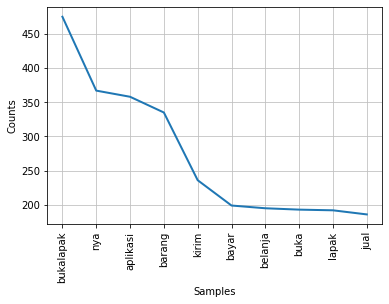

In [45]:
import matplotlib.pyplot as plt

# plotting
fqdist.plot(10,cumulative=False)
plt.show()

In [50]:
label = []
for index, row in name_dataframe.iterrows():
    if row["Rating"] == 5 or row["Rating"] == 4:
        label.append(1)
    else:
        label.append(0)

name_dataframe["label"] = label

name_dataframe

,Nama pengguna,Rating,Date,Ulasan,Ulasan_tokenize,Ulasan_normalized,Ulasan_stop_removed,Ulasan_Stemmed,Ulasan_clean,label
0,ReGodam ReloadME,2,2022-08-04 05:10:30,menu dalam apps lebih sedikit contohnya tidak ...,"[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, dalam, apps, lebih, sedikit, contohnya,...","[menu, apps, contohnya, menu, history, pengiri...","[menu, apps, contoh, menu, history, kirim, nom...",menu apps contoh menu history kirim nomor resi...,0
1,Rahman F Official,3,2022-10-15 03:40:36,apknya bagus sih cuma kalau ada pesanan masuk ...,"[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, cuma, kalau, ada, pesanan...","[apknya, bagus, sih, pesanan, masuk, orderan, ...","[apknya, bagus, sih, pesan, masuk, order, noti...",apknya bagus sih pesan masuk order notifikasi ...,0
2,FilNoz CH,1,2022-08-15 16:53:45,mau belanja ribet di bukalapak harus melalui d...,"[mau, belanja, ribet, di, bukalapak, harus, me...","[mau, belanja, ribet, di, bukalapak, harus, me...","[belanja, ribet, bukalapak, dana, hatihati, be...","[belanja, ribet, bukalapak, dana, hatihati, be...",belanja ribet bukalapak dana hatihati belanja ...,0
3,ahmad y,5,2022-09-22 10:36:22,dari pelayanan sih ga pernah mengecewakan tapi...,"[dari, pelayanan, sih, ga, pernah, mengecewaka...","[dari, pelayanan, sih, enggak, pernah, mengece...","[pelayanan, sih, mengecewakan, mengasih, masuk...","[layan, sih, kecewa, asih, masuk, nih, tim, bl...",layan sih kecewa asih masuk nih tim bl cari ba...,1
4,Denny Pramudita,1,2022-08-29 12:49:06,sangat kecewa sekali pembayaran dengan paylete...,"[sangat, kecewa, sekali, pembayaran, dengan, p...","[sangat, kecewa, sekali, pembayaran, dengan, p...","[kecewa, pembayaran, payleter, biaya, layanan,...","[kecewa, bayar, payleter, biaya, layan, tampil...",kecewa bayar payleter biaya layan tampil awal ...,0
...,...,...,...,...,...,...,...,...,...,...
996,Rahman Saputra,1,2022-08-03 19:22:57,tolong kembalikan seperti semula akun sayakarn...,"[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, seperti, semula, akun, sa...","[tolong, kembalikan, akun, sayakarna, membutuh...","[tolong, kembali, akun, sayakarna, butuh, sald...",tolong kembali akun sayakarna butuh saldo dana...,0
997,nabil 85,5,2022-08-14 06:00:43,selalu belanja di tempat ini sejak dulu kalau ...,"[selalu, belanja, di, tempat, ini, sejak, dulu...","[selalu, belanja, di, tempat, ini, sejak, dulu...","[belanja, dikasih, bintang, bagus, mengharap, ...","[belanja, kasih, bintang, bagus, harap, bintan...",belanja kasih bintang bagus harap bintang jele...,1
998,Narto Toaja,5,2022-09-24 08:34:13,belanja makin mudahdan bisa cari barang yg di ...,"[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, makin, mudahdan, bisa, cari, barang,...","[belanja, mudahdan, cari, barang]","[belanja, mudahdan, cari, barang]",belanja mudahdan cari barang,1
999,Pengguna Google,5,2022-09-11 12:56:54,belanja mudah pelayanan cepat harga baik,"[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga, baik]","[belanja, mudah, pelayanan, cepat, harga]","[belanja, mudah, layan, cepat, harga]",belanja mudah layan cepat harga,1


In [53]:
name_dataframe["label"].value_counts()

0    600
1    401
Name: label, dtype: int64

In [54]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [57]:
Ulasan = name_dataframe['Ulasan_clean']

In [58]:
Ulasan.isnull().sum()

0

In [59]:
#untuk menghitung jumlah kata yang telah di steming
cv = CountVectorizer()
term_fit = cv.fit(Ulasan)

print (len(term_fit.vocabulary_))

3049


In [60]:
term_fit.vocabulary_ #mengurutkan berdasarkan urutab abjad kata 

{'menu': 1680,
 'apps': 160,
 'contoh': 595,
 'history': 1028,
 'kirim': 1317,
 'nomor': 1846,
 'resi': 2293,
 'daftar': 622,
 'transakski': 2874,
 'cuman': 615,
 'status': 2634,
 'beli': 305,
 'proses': 2191,
 'selesai': 2475,
 'akses': 59,
 'website': 3017,
 'tolong': 2848,
 'lengkap': 1491,
 'salah': 2367,
 'jual': 1181,
 'apknya': 145,
 'bagus': 195,
 'sih': 2568,
 'pesan': 2107,
 'masuk': 1624,
 'order': 1940,
 'notifikasi': 1857,
 'terkadang': 2772,
 'muncul': 1765,
 'telat': 2726,
 'konfirmasi': 1358,
 'diomelin': 727,
 'langgan': 1441,
 'batal': 262,
 'baik': 210,
 'biar': 364,
 'nyaman': 1874,
 'pakai': 1969,
 'apk': 140,
 'bl': 401,
 'terima': 2765,
 'kasih': 1230,
 'belanja': 300,
 'ribet': 2314,
 'bukalapak': 454,
 'dana': 629,
 'hatihati': 1011,
 'kemarin': 1266,
 'isi': 1113,
 'token': 2833,
 'listrik': 1514,
 'saldo': 2373,
 'ribu': 2320,
 'bayar': 273,
 'verifikasi': 2974,
 'sms': 2606,
 'wa': 2999,
 'celaka': 549,
 'seluler': 2483,
 'hilang': 1023,
 'ganti': 917,
 'aku

In [61]:
#kolom pertama ini berarti jumlah dokumen
#kolom kedua berarti letak katanya
#kolom ketiga hasil dari tf

term_frequency_all = term_fit.transform(Ulasan)
print (term_frequency_all)

  (0, 59)	1
  (0, 160)	1
  (0, 305)	1
  (0, 595)	1
  (0, 615)	1
  (0, 622)	1
  (0, 1028)	2
  (0, 1181)	1
  (0, 1317)	4
  (0, 1491)	1
  (0, 1680)	2
  (0, 1846)	1
  (0, 2191)	2
  (0, 2293)	1
  (0, 2367)	1
  (0, 2475)	1
  (0, 2634)	2
  (0, 2848)	1
  (0, 2874)	1
  (0, 3017)	1
  (1, 140)	1
  (1, 145)	1
  (1, 195)	1
  (1, 210)	1
  (1, 262)	1
  :	:
  (997, 1208)	1
  (997, 1230)	1
  (997, 1306)	1
  (997, 1834)	1
  (997, 2924)	1
  (998, 247)	1
  (998, 300)	1
  (998, 538)	1
  (998, 1755)	1
  (999, 300)	1
  (999, 556)	1
  (999, 1003)	1
  (999, 1474)	1
  (999, 1753)	1
  (1000, 445)	1
  (1000, 491)	1
  (1000, 606)	3
  (1000, 975)	1
  (1000, 1037)	1
  (1000, 1209)	1
  (1000, 1346)	1
  (1000, 1697)	1
  (1000, 2611)	1
  (1000, 2649)	1
  (1000, 2679)	1


In [62]:
ulasan_tf = Ulasan[1] #memanggil kata pada index ke 1
print (ulasan_tf)

apknya bagus sih pesan masuk order notifikasi terkadang muncul telat konfirmasi pesan masuk diomelin langgan pesan batal tolong baik biar nyaman pakai apk bl terima kasih


In [63]:
term_frequency = term_fit.transform([ulasan_tf]) #hanya menampilkan hasil document 1
print (term_frequency)

  (0, 140)	1
  (0, 145)	1
  (0, 195)	1
  (0, 210)	1
  (0, 262)	1
  (0, 364)	1
  (0, 401)	1
  (0, 727)	1
  (0, 1230)	1
  (0, 1358)	1
  (0, 1441)	1
  (0, 1624)	2
  (0, 1765)	1
  (0, 1857)	1
  (0, 1874)	1
  (0, 1940)	1
  (0, 1969)	1
  (0, 2107)	3
  (0, 2568)	1
  (0, 2726)	1
  (0, 2765)	1
  (0, 2772)	1
  (0, 2848)	1


In [64]:
dokumen = term_fit.transform(Ulasan) #hasil perhitungan tf idf dalam 1 doc
tfidf_transformer = TfidfTransformer().fit(dokumen)
print (tfidf_transformer.idf_)

tfidf=tfidf_transformer.transform(term_frequency)
print (tfidf) #hasil manual dengan sistem pyhton

[6.30031537 6.81114099 7.2166061  ... 6.81114099 6.52345892 7.2166061 ]
  (0, 2848)	0.14123659996929164
  (0, 2772)	0.26024623479682724
  (0, 2765)	0.1334612648282978
  (0, 2726)	0.19808576516625803
  (0, 2568)	0.15425783352590755
  (0, 2107)	0.42220434977127713
  (0, 1969)	0.11700959582454333
  (0, 1940)	0.19409304541861788
  (0, 1874)	0.19409304541861788
  (0, 1857)	0.22369182158527137
  (0, 1765)	0.1855727410632381
  (0, 1624)	0.2729634097407268
  (0, 1441)	0.1855727410632381
  (0, 1358)	0.1674020446848417
  (0, 1230)	0.1387883531998319
  (0, 727)	0.2878985809062203
  (0, 401)	0.15155212547342437
  (0, 364)	0.1904638261594419
  (0, 262)	0.16368830441396345
  (0, 210)	0.15221154383552793
  (0, 195)	0.14073478325709238
  (0, 145)	0.2878985809062203
  (0, 140)	0.16939715553228063


In [68]:
data_label = name_dataframe[["Nama pengguna", "Ulasan_clean", "label"]]

In [69]:
data_label["Ulasan_clean"] = data_label["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [70]:
data_label.to_excel("data_label.xlsx")

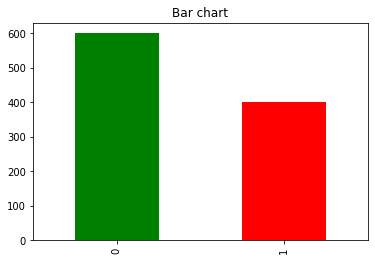

In [71]:
sentimen_data=pd.value_counts(data_label["label"], sort= True)
sentimen_data.plot(kind= 'bar', color= ["green", "red"])
plt.title('Bar chart')
plt.show()

In [67]:
name_dataframe.columns

Index(['Nama pengguna', 'Rating', 'Date', 'Ulasan', 'Ulasan_tokenize',
       'Ulasan_normalized', 'Ulasan_stop_removed', 'Ulasan_Stemmed',
       'Ulasan_clean', 'label'],
      dtype='object')

In [72]:
from wordcloud import WordCloud

In [73]:
train_s0 = data_label[data_label["label"] == 0]

In [74]:
train_s0["Ulasan_clean"] = train_s0["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
train_s0

,Nama pengguna,Ulasan_clean,label
0,ReGodam ReloadME,menu apps contoh menu history kirim nomor resi...,0
1,Rahman F Official,apknya bagus sih pesan masuk order notifikasi ...,0
2,FilNoz CH,belanja ribet bukalapak dana hatihati belanja ...,0
4,Denny Pramudita,kecewa bayar payleter biaya layan tampil awal ...,0
5,M. rokhim,aplikasi maju fikturnya rumit ganti nomer imai...,0
...,...,...,...
992,२िลɦɱลɳ Gan,parah verifikasi kyc verifikasi wajah sensor n...,0
994,Dewi Store,proses tari saldo tracking telat update,0
995,Randhy Bro,hatihati aplikasi mafia instal aplikasi bahaya...,0
996,Rahman Saputra,tolong kembali akun sayakarna butuh saldo dana...,0


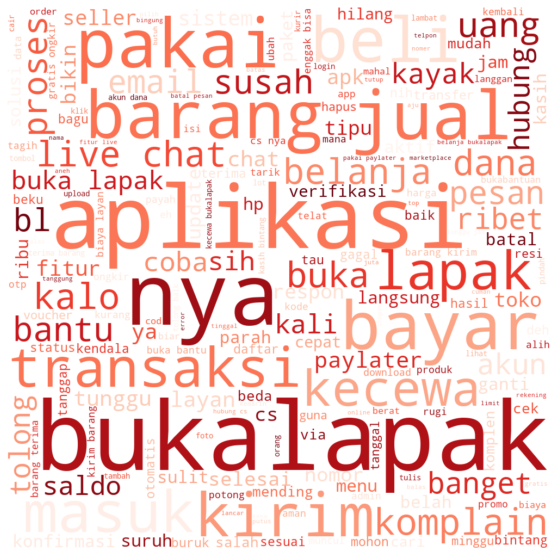

In [76]:
all_text_s0 = ' '.join(word for word in train_s0["Ulasan_clean"])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s0)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [77]:
train_s1 = data_label[data_label["label"] == 1]

In [78]:
train_s1["Ulasan_clean"] = train_s1["Ulasan_clean"].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [79]:
train_s1

,Nama pengguna,Ulasan_clean,label
3,ahmad y,layan sih kecewa asih masuk nih tim bl cari ba...,1
9,Nizar Tristanto,bayar paylater batal pakai kali belanja sisa s...,1
12,Kezya Minar,transaksi mudah pilih item lengkap variasi kir...,1
15,Teddy Junewal,belanja online rekomendasi bukalapak toko onli...,1
16,muhamad yusup,bukalapak kayak jual nya tingkat unjung nya va...,1
...,...,...,...
991,Dendy nr,play tren daftar nik ktp daftar nomor hp ankun...,1
993,Rian Click,bagus app nya mudah belanja jos gandos pokoke,1
997,nabil 85,belanja kasih bintang bagus harap bintang jele...,1
998,Narto Toaja,belanja mudahdan cari barang,1


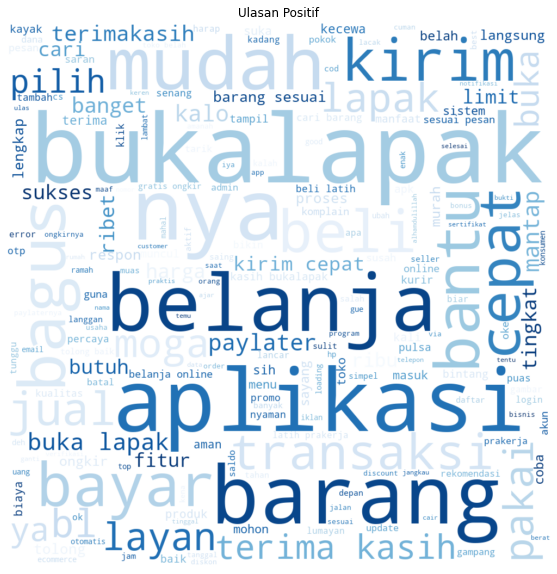

In [80]:
all_text_s1 = ' '.join(word for word in train_s1["Ulasan_clean"])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_text_s1)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Ulasan Positif")
plt.margins(x=0, y=0)
plt.show()

In [81]:
data_label['Ulasan_clean'] = data_label['Ulasan_clean'].fillna("tidak ada komentar")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_label['Ulasan_clean'], data_label['label'], 
                                                    test_size=0.1, stratify=data_label['label'], random_state=30)

In [83]:
import numpy as np

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(decode_error='replace', encoding='utf-8')

In [85]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(900, 2872)
(101, 2872)


In [86]:
X_train = X_train.toarray()

In [87]:
X_test = X_test.toarray()

In [88]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

In [89]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

#deklarasi metode cross validation
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)
#tuning hyperparameter menggunakan gridsearch

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gscv_nb = GridSearchCV(estimator=nb, 
                 param_grid=params_NB, 
                 cv=cv_method,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 

#Fitting ke Model
gscv_nb.fit(X_train,y_train)
#mendapatkan hyperparameters terbaik
gscv_nb.best_params_

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


{'var_smoothing': 0.01873817422860384}

In [90]:
nb = GaussianNB(var_smoothing=1.0)

In [91]:
nb.fit(X_train, y_train)

GaussianNB(var_smoothing=1.0)

In [92]:
y_pred_nb = nb.predict(X_test)

In [93]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [94]:
print('--------------------- confusion matrix  ----------------------------')
print(confusion_matrix(y_test, y_pred_nb))
print('--------------------- classification report  ----------------------------')
print(classification_report(y_test, y_pred_nb))

--------------------- confusion matrix  ----------------------------
[[43 18]
 [ 5 35]]
--------------------- classification report  ----------------------------
              precision    recall  f1-score   support

           0       0.90      0.70      0.79        61
           1       0.66      0.88      0.75        40

    accuracy                           0.77       101
   macro avg       0.78      0.79      0.77       101
weighted avg       0.80      0.77      0.77       101

